In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam, Cluster

import numpy as np
from matplotlib import pyplot as plt

In [2]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_GluA1 = 150.32
Tau_D_GluA2 = 97
background_threshold = 500
homer_path = '../Examples/A1_aHomer_corrected.csv'
life_act_path = '../Examples/A1_Composite.tif'
deepd3_path = 'DeepD3_32F.h5'
points = [['GluA1', r'../Examples/A1_GluA1_corrected.csv', 'white', time_per_frame, Tau_D_GluA1],
          ['GluA2', r'../Examples/A1_GluA2_corrected.csv', 'cyan', time_per_frame, Tau_D_GluA2]]
# Params = [ClusterParam(25, 25, 'GluA1'),
#           ClusterParam(25, 50, 'GluA1'),
#           ClusterParam(25, 75, 'GluA1'),
#           ClusterParam(25, 100, 'GluA1'),
#           ClusterParam(25, 15, 'GluA2'),
#           ClusterParam(25, 25, 'GluA2'),
#           ClusterParam(25, 50, 'GluA2'),
#           ClusterParam(25, 75, 'GluA2'),]
Params = [ClusterParam(25, 15, 'GluA2')]

# Params = [ClusterParam(80, 25, 'GluA1')]
FOV_A = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path,
                    deepd3_pred_thresh=0.3)

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 2s 2s/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA2(eps=25, min_samples=15)...
Found 5063 Clusters
Filtering Bad Spines...


In [3]:
sizes = FOV_A.get_all_cluster_sizes(Params[0])
# print(sizes)
print(len(sizes))
areas = FOV_A.get_all_cluster_areas(Params[0])
# print(areas)
print(len(areas))
densities = FOV_A.get_all_cluster_densities(Params[0])
# print(densities)
print(len(densities))
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time=500)
# print(distances_to_homer)
print(len(distances_to_homer))

136
136
136
136


In [14]:
def moving_average(x, y, window_size):
    """
    Calculate the moving average of the y-values, using a given window size.
    """
    # Sort x and y by x-values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Compute moving averages
    moving_averages = []
    moving_averages_x = []

    # Use a deque (double-ended queue) to store the values in the current window
    from collections import deque
    window = deque(maxlen=window_size)  # Only holds `window_size` number of elements

    # Use the index of the sorted x-values to iterate and calculate the moving average
    for i in range(len(x_sorted)):
        # Append the next y-value to the window
        window.append(y_sorted[i])

        # Calculate the mean of the current window
        window_mean = np.mean(window)

        # Store the moving average and corresponding x-value
        moving_averages.append(window_mean)
        moving_averages_x.append(x_sorted[i])

    return moving_averages_x, moving_averages

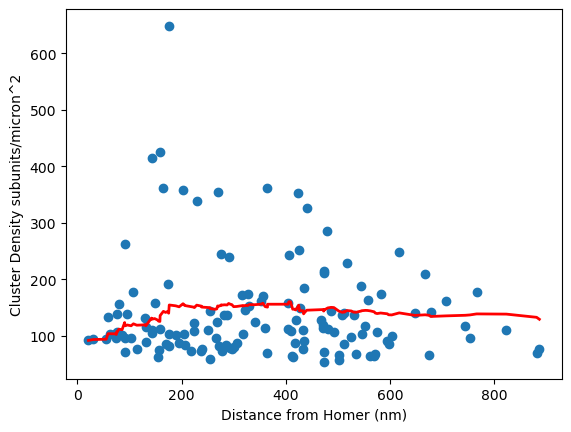

In [29]:
from matplotlib import pyplot as plt
distances_to_homer = FOV_A.get_all_distances_to_homer(Params[0], max_dark_time=500)
densities = FOV_A.get_all_cluster_densities(Params[0])

greatest_density = 1000
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if densities[i] < greatest_density]
densities = [densities[i] for i in range(len(densities)) if densities[i] < greatest_density]

window = 50
average_distances, average_densities = moving_average(np.array(distances_to_homer), np.array(densities), window)

plt.figure()
plt.scatter(distances_to_homer, densities)
plt.plot(average_distances, average_densities, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Density subunits/micron^2")
plt.xlabel("Distance from Homer (nm)")
plt.show()

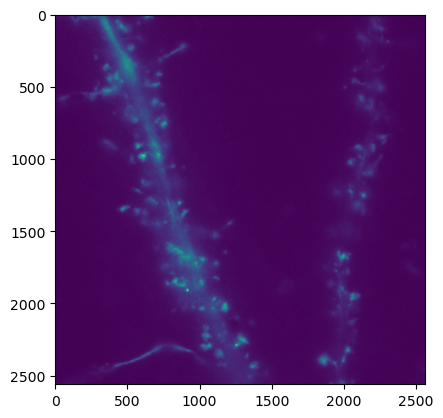

In [30]:
plt.imshow(FOV_A.life_act)

In [4]:
FOV_A.write_clusters_to_csv(filename="Cluster.csv", Tau_D=97, 
                            Params=Params, max_dark_time=500)

Cluster.csv created successfully!


In [43]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_7xR3 = 150.32
Tau_D_16xR1 = 97
background_threshold = 500
label = "0317_C1_"
homer_path = "Data/Homer/" + label + "aHomer_corrected.csv"
life_act_path = "Data/LifeAct/" + label + "Composite.tif"
deepd3_path = 'DeepD3_32F.h5'
points = [['GluA1', "Data/7xR3/" + label + "GluA1_corrected.csv", 'white', time_per_frame, Tau_D_7xR3],
          ['GluA2', "Data/16xR1/" + label + "GluA2_corrected.csv", 'cyan', time_per_frame, Tau_D_16xR1]]
Params = [ClusterParam(25, 15, 'GluA1'),
          ClusterParam(25, 25, 'GluA1'),
          ClusterParam(25, 50, 'GluA1'),
          ClusterParam(25, 75, 'GluA1'),
          ClusterParam(25, 15, 'GluA2'),
          ClusterParam(25, 25, 'GluA2'),
          ClusterParam(25, 50, 'GluA2'),
          ClusterParam(25, 75, 'GluA2'),]

FOV_B = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path,
                    deepd3_pred_thresh=0.1)

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 0s 339ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Loading GluA2...
Finding Clusters for: GluA1(eps=25, min_samples=15)...
Found 922 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=25)...
Found 457 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=50)...
Found 165 Clusters
Finding Clusters for: GluA1(eps=25, min_samples=75)...
Found 84 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=15)...
Found 5229 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=25)...
Found 3256 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=50)...
Found 1273 Clusters
Finding Clusters for: GluA2(eps=25, min_samples=75)...
Found 610 Clusters
Filtering Bad Spines...


1/1 [==============================] - 0s 334ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


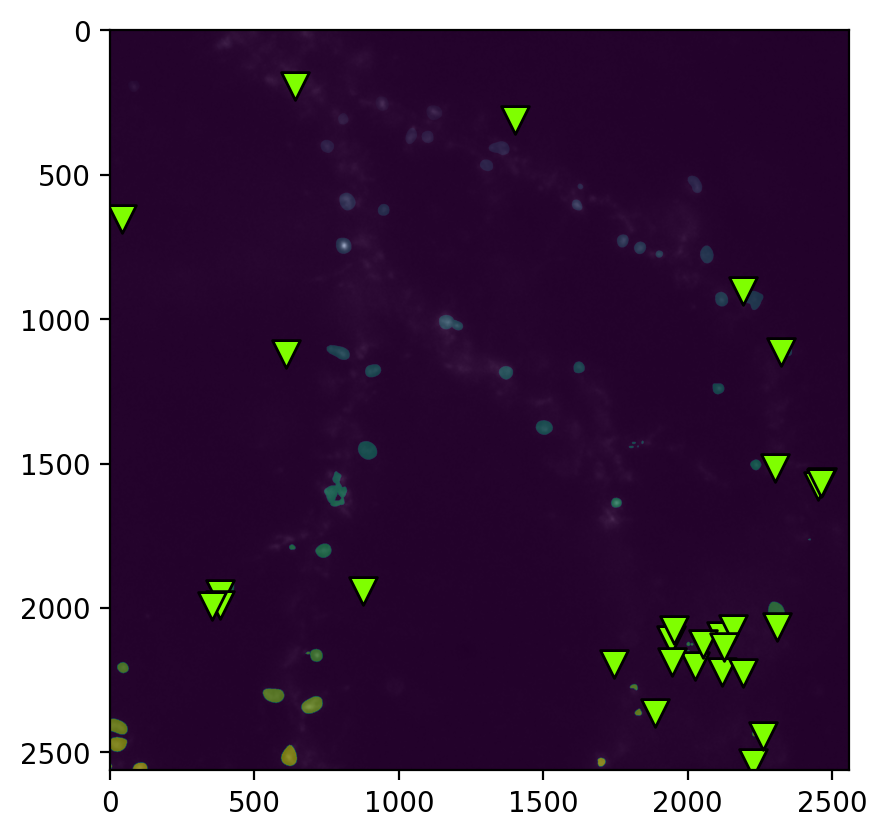

In [44]:
FOV = FOV_B
plt.figure(dpi=200)
plt.imshow(FOV.life_act, cmap='gray')
plt.imshow(FOV.deepd3_thresholding(deepd3_path, [512, 512], 500, 0.1)[1], alpha=0.5, cmap='viridis')
FOV.all_homer_centers.add_to_plot()
plt.show()